QUESTION 1:

In [148]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
lab_dataSheet=pd.read_csv("movies (1).csv")
lab_dataSheet1=pd.read_csv("movies (1).csv")



In [150]:
for i in range(len(lab_dataSheet)):  
    data = lab_dataSheet.loc[i, "STARS"]  
    
    if pd.notna(data) and "Stars:" in data:  
        stars_index = data.find("Stars:") + len("Stars:")  
        stars_list = data[stars_index:].strip()  
        stars_array = [star.strip() for star in stars_list.split(",") if star.strip()]
    else:
        stars_array = []
    
    lab_dataSheet.loc[i, "STARS"] = ", ".join(stars_array)


In [151]:
lab_dataSheet["Actors"]=lab_dataSheet["STARS"]

In [152]:
for i in range(len(lab_dataSheet1)):  
    data = lab_dataSheet1.loc[i, "STARS"] 
    
    if pd.notna(data) and "Director:" in data: 
         
        index = data.find("Stars")
        if index != -1:
            data = data[:index].strip()

        director_index = data.find("Director:") + len("Director:")  
        director_list = data[director_index:].strip()  
        director_array = [star.strip() for star in director_list.split(",") if star.strip()]
        
    else:
        director_array = []
    
    a= ", ".join(director_array)
    cleaned_name = a.split('\n')[0].strip('|').strip()
    lab_dataSheet1.loc[i, "STARS"] = cleaned_name

 
    
    


In [153]:
lab_dataSheet["Director"]=lab_dataSheet1["STARS"]

In [154]:
datasheet=pd.DataFrame(lab_dataSheet)

In [155]:
datasheet=datasheet.drop("STARS",axis=1)


In [156]:
datasheet.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Actors,Director
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,"21,062",121.0,NaN,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",Peter Thorwarth
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"17,870",25.0,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"885,805",44.0,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride...",
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"414,849",23.0,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer...",
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",NaN,NaN,NaN,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",Matthias Schweighöfer


In [159]:

datasheet['Actors'] = datasheet['Actors'].fillna('')


datasheet['Actor_List'] = datasheet['Actors'].str.split(', ')


In [161]:
exploded_data = datasheet.explode('Actor_List')

actor_ratings = (
    exploded_data.groupby('Actor_List')['RATING']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print(actor_ratings)


Actor_List
Lisa Kreuzer            9.70
Deneen Fendig           9.70
Sebastian Rudolph       9.65
Gary Anthony Sturgis    9.60
Arnd Klawitter          9.60
Mako                    9.60
Paul Lux                9.60
Sandra Borgmann         9.50
Helena Pieske           9.50
Stephan Kampwirth       9.45
Name: RATING, dtype: float64


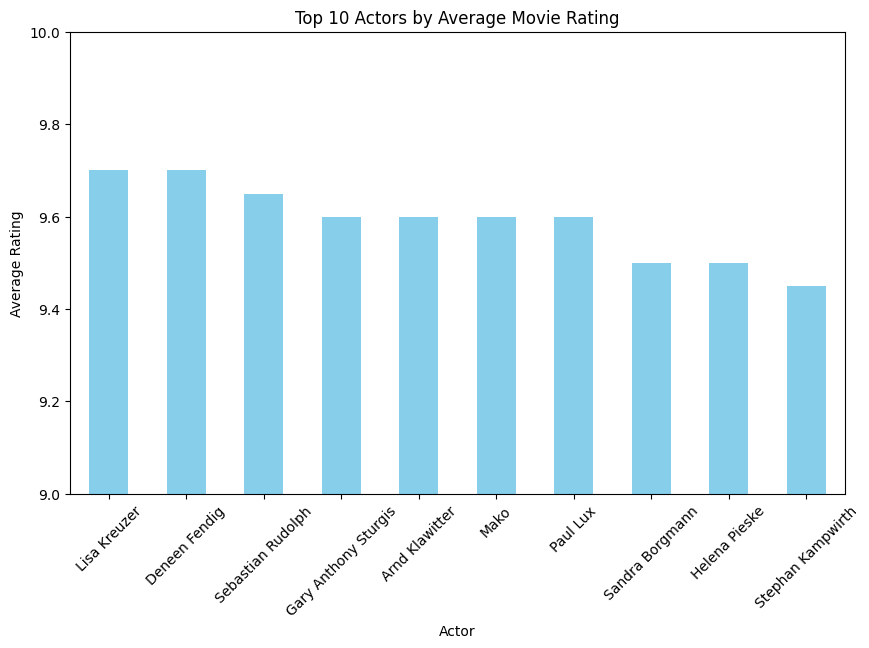

In [ ]:
plt.figure(figsize=(10, 6))
actor_ratings.plot(kind='bar', color='skyblue')
plt.title('Top 10 Actors by Average Movie Rating')
plt.xlabel('Actor')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(9,10)
plt.show()


question 2 